<a href="https://colab.research.google.com/github/AdilGeelani/Plant-Disease-Detection/blob/main/Plant_disease_detectionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
# Importing the zip file and unzipping it
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/dataset/new-plant-diseases-dataset.zip")
zip_ref.extractall(path = "/content/")
zip_ref.close()

In [ ]:
# check the folders in the extracted data 
%cd /content/new plant diseases dataset(augmented)

/content/new plant diseases dataset(augmented)


In [9]:
!ls data



train  valid


In [10]:
import os

for dirpath, dirnames, filenames in os.walk("data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'data'.
There are 38 directories and 0 images in 'data/valid'.
There are 0 directories and 465 images in 'data/valid/Corn_(maize)___healthy'.
There are 0 directories and 477 images in 'data/valid/Corn_(maize)___Common_rust_'.
There are 0 directories and 456 images in 'data/valid/Cherry_(including_sour)___healthy'.
There are 0 directories and 472 images in 'data/valid/Grape___Black_rot'.
There are 0 directories and 444 images in 'data/valid/Strawberry___Leaf_scorch'.
There are 0 directories and 477 images in 'data/valid/Corn_(maize)___Northern_Leaf_Blight'.
There are 0 directories and 440 images in 'data/valid/Apple___Cedar_apple_rust'.
There are 0 directories and 497 images in 'data/valid/Pepper,_bell___healthy'.
There are 0 directories and 425 images in 'data/valid/Tomato___Bacterial_spot'.
There are 0 directories and 463 images in 'data/valid/Tomato___Late_blight'.
There are 0 directories and 456 images in 'data/valid/Strawberry___healthy'.
The

In [11]:
# Get the calss names programmtically
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/new plant diseases dataset(augmented)/data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the sundirectorie
print(class_names)

['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tom

In [12]:
len(class_names)

38

In [13]:
# Let's Visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random
def view_random_images(target_dir, target_class):
  # Setup the target directory(we'll view images from here)
  target_folder = target_dir + "/" + target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  #Read in the images and plot it using matplot lib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape :{img.shape}")
  print(f"Max values of tensor in images: {img.max()}")
  return img

['570486a0-abe0-4046-add9-14aab37de620___PSU_CG 2313_new30degFlipLR.JPG']
Image shape :(256, 256, 3)
Max values of tensor in images: 194


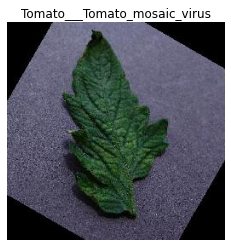

In [14]:
# view a random image from a folder in the data set
img = view_random_images(target_dir="/content/new plant diseases dataset(augmented)/data/train", target_class= "Tomato___Tomato_mosaic_virus")

In [17]:
# as we can see the images have max tensor value 255 so we need to scale the images for better results

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# make the directories for the train and test

train_dir = "/content/new plant diseases dataset(augmented)/data/train"
valid_dir = "/content/new plant diseases dataset(augmented)/data/valid"

# rescalling
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

# Importing the data
print("For the training:")
train_data =  train_datagen.flow_from_directory(directory = train_dir,
                                                target_size = (256,256),
                                                batch_size = 32,
                                                class_mode = "categorical",
                                                subset = "training")
print("For the validation:")
# making validation dataset
validation_data = train_datagen.flow_from_directory(directory = valid_dir,
                                                    target_size = (256, 256),
                                                    batch_size = 32,
                                                    class_mode = "categorical",
                                                    subset = "validation")

For the training:
Found 56251 images belonging to 38 classes.
For the validation:
Found 3503 images belonging to 38 classes.


In [ ]:
# we can make a base model and make it as base line for making other models and compare the accuracy
import tensorflow as tf
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(filters = 10,
                                                      kernel_size = 3,
                                                      strides = 1,
                                                      activation = "relu",
                                                      input_shape = (256,256, 3)),
                               tf.keras.layers.MaxPool2D(), # Keep all the parameters to default
                               tf.keras.layers.Conv2D(10, 3, 1, activation = "relu"),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(38, activation = "softmax")  # 38 outputs labels 
                              ])

# compile the model
model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = validation_data,
                        validation_steps = len(validation_data)
                        )

Epoch 1/5
1758/1758 [==============================] - 166s 93ms/step - loss: 1.1027 - accuracy: 0.6846 - val_loss: 0.8642 - val_accuracy: 0.7408
Epoch 2/5
1758/1758 [==============================] - 159s 90ms/step - loss: 0.3475 - accuracy: 0.8960 - val_loss: 0.8375 - val_accuracy: 0.7662
Epoch 3/5
1758/1758 [==============================] - 156s 89ms/step - loss: 0.1302 - accuracy: 0.9618 - val_loss: 1.0025 - val_accuracy: 0.7516
Epoch 4/5
1758/1758 [==============================] - 157s 89ms/step - loss: 0.0774 - accuracy: 0.9770 - val_loss: 1.2487 - val_accuracy: 0.7456
Epoch 5/5
1758/1758 [==============================] - 154s 88ms/step - loss: 0.0523 - accuracy: 0.9845 - val_loss: 1.2867 - val_accuracy: 0.7342


In [26]:
# plot the validation and training curve seperately
def plot_loss_curves(history):
  """
  Return seperate loss curve for training and validation
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"])) #how many epochs did we run for
  # plot the losses
  plt.plot(epochs, loss, label ="training loss")
  plt.plot(epochs, val_loss, label ="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot the accuracy
  plt.figure() # when ever you want a seperate curve 
  plt.plot(epochs, accuracy, label ="training accuracy")
  plt.plot(epochs, val_accuracy, label ="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

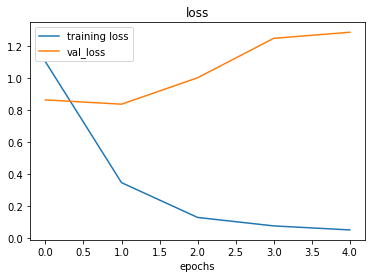

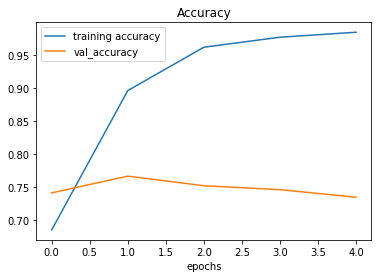

In [ ]:
plot_loss_curves(history_1)

### So we can see the graphs are not very motivative we can say the model is over fitting the data as the training loss is very less and the training accuracy is very high but it is vice-versa in case of validation data

In [ ]:
# lets increase the filters and no of comv2d layers lets see what happens!!!
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = (3,3),
                           padding = 'same',
                           strides = 1,
                           activation = 'relu',
                           input_shape = (256,256,3)),
    tf.keras.layers.Conv2D(32, 3, padding = "same", activation = "relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(64, 3, padding = "same", activation = "relu"),
    tf.keras.layers.Conv2D(64, 3, padding = "same", activation = "relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(128, 3, padding = "same", activation = "relu"),
    tf.keras.layers.Conv2D(128, 3, padding = "same", activation = "relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(256, 3, padding = "same", activation = "relu"),
    tf.keras.layers.Conv2D(256, 3, padding = "same", activation = "relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(512, 5, padding = "same", activation = "relu"),
    tf.keras.layers.Conv2D(512, 5, padding = "same", activation = "relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1568, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(38, activation = "softmax")
])

# compile the model
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = validation_data,
                        validation_steps = len(validation_data)
                        )


Epoch 1/5
1758/1758 [==============================] - 400s 225ms/step - loss: 3.6551 - accuracy: 0.0274 - val_loss: 3.6362 - val_accuracy: 0.0285
Epoch 2/5
1758/1758 [==============================] - 397s 226ms/step - loss: 3.6366 - accuracy: 0.0277 - val_loss: 3.6361 - val_accuracy: 0.0288
Epoch 3/5
1758/1758 [==============================] - 398s 226ms/step - loss: 3.6365 - accuracy: 0.0281 - val_loss: 3.6361 - val_accuracy: 0.0285
Epoch 4/5
1758/1758 [==============================] - 396s 225ms/step - loss: 3.6365 - accuracy: 0.0283 - val_loss: 3.6360 - val_accuracy: 0.0285
Epoch 5/5
1758/1758 [==============================] - 400s 227ms/step - loss: 3.6364 - accuracy: 0.0279 - val_loss: 3.6360 - val_accuracy: 0.0288


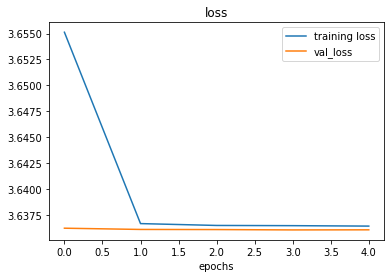

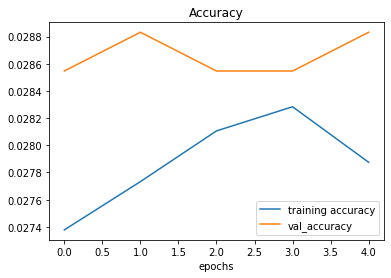

In [ ]:
plot_loss_curves(history_2)


 ### so the accuracy is too low we need to make our model learn in better way 

In [ ]:
# as in model 1 the model was getting over fitted we try to reduce no of Conv2D layers
import tensorflow as tf
model_3 = tf.keras.Sequential([
                                tf.keras.layers.Conv2D(10, 3, 1, activation = "relu", input_shape = (256, 256, 3)),
                                tf.keras.layers.MaxPool2D(),
                                tf.keras.layers.Conv2D(10, 3, 1, activation = "relu"),
                                tf.keras.layers.MaxPool2D(),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(38, activation = "softmax")
])
# if we use clone we have still compile and train
# compile the model
model_3.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit the model
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = validation_data,
                        validation_steps = len(validation_data)
                        )


Epoch 1/5
1758/1758 [==============================] - 157s 89ms/step - loss: 1.1618 - accuracy: 0.6653 - val_loss: 0.8205 - val_accuracy: 0.7554
Epoch 2/5
1758/1758 [==============================] - 155s 88ms/step - loss: 0.4641 - accuracy: 0.8603 - val_loss: 0.7639 - val_accuracy: 0.7816
Epoch 3/5
1758/1758 [==============================] - 162s 92ms/step - loss: 0.2447 - accuracy: 0.9250 - val_loss: 0.7911 - val_accuracy: 0.7959
Epoch 4/5
1758/1758 [==============================] - 157s 89ms/step - loss: 0.1414 - accuracy: 0.9555 - val_loss: 0.9662 - val_accuracy: 0.7796
Epoch 5/5
1758/1758 [==============================] - 156s 89ms/step - loss: 0.1053 - accuracy: 0.9678 - val_loss: 1.0990 - val_accuracy: 0.7659


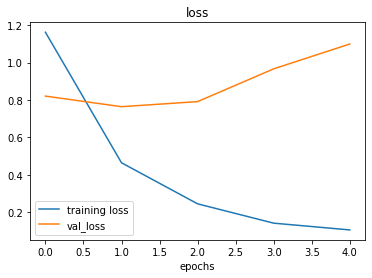

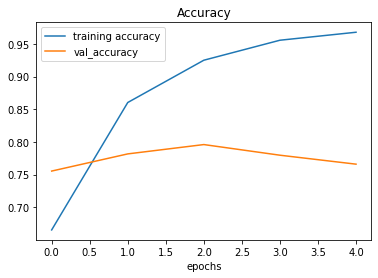

In [ ]:
plot_loss_curves(history_3)

In [33]:
# lets make a prediction
# lets make a function to do the data prerpocessing as we did for the training data
def load_prep_pred_plot(model, filename, class_names = class_names, img_size = 256):
  """Read the image , make shape changes to the images so that it can be read by the model and predict the class and plot the image withg predicted labels
  """
  # Read the images
  img = tf.io.read_file(filename)
  # Decode the image
  img = tf.image.decode_image(img, channels = 3)
  # Resize the image
  img = tf.image.resize(img, [img_size, img_size])
  # rescalling the image
  img = img/255.
  # pred the image and we get prediction_probabilities
  pred = model.predict(tf.expand_dims(img, axis = 0))
  # Make if statefor the multiclass classification
  if len(pred[0]) > 1:
    pred_class = class_names[pred.argmax()] #if more than one output print max one
  else:
    pred_class = class_names[tf.round(pred)] # if only one class we have to rounf towards max and print
  # plot the image
  plt.imshow(img)
  plt.title(f"Prediction :{pred_class}")
  plt.axis(False)

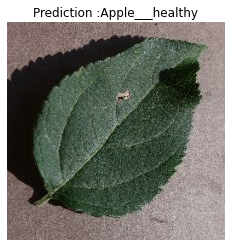

In [ ]:
load_prep_pred_plot(model_3, "/content/0e99efe9-d414-4091-b7b4-6ba6856db3d9___RS_HL 5841.JPG")

### Lets try to use the pretrained model and import a model and check the accuracy for the same

In [18]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(256, 256, 3), name="input_layer")

# 4. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNet inputs don't have to be normalized)
x = base_model(inputs)

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(38, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_4 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_4.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Fit the model (we use less steps for validation so it's faster)
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data,
                        # Go through less of the validation data so epochs are faster (we want faster experiments!)
                        validation_steps=len(validation_data), 
                        )

16719872/16705208 [==============================] - 0s 0us/step
After GlobalAveragePooling2D(): (None, 1280)
Epoch 1/5
1758/1758 [==============================] - 193s 101ms/step - loss: 3.6556 - accuracy: 0.0270 - val_loss: 3.6453 - val_accuracy: 0.0288
Epoch 2/5
1758/1758 [==============================] - 171s 97ms/step - loss: 3.6551 - accuracy: 0.0274 - val_loss: 3.6483 - val_accuracy: 0.0260
Epoch 3/5
1758/1758 [==============================] - 168s 96ms/step - loss: 3.6561 - accuracy: 0.0274 - val_loss: 3.6514 - val_accuracy: 0.0283
Epoch 4/5
1758/1758 [==============================] - 168s 96ms/step - loss: 3.6550 - accuracy: 0.0272 - val_loss: 3.6463 - val_accuracy: 0.0254
Epoch 5/5
1758/1758 [==============================] - 172s 98ms/step - loss: 3.6542 - accuracy: 0.0275 - val_loss: 3.6449 - val_accuracy: 0.0283


In [19]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [20]:
# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

In [21]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [22]:
# Fine-tune for 5 more epochs
fine_tune_epochs = 10 # model has already done 5 epochs, this is the total number of epochs we're after (5+5=10)

history_4_fine_tune = model_4.fit(train_data,
                                  epochs=fine_tune_epochs,
                                  validation_data=validation_data,
                                  validation_steps=len(validation_data),
                                  initial_epoch=history_4.epoch[-1]) # start from previous last epoch

Epoch 5/10
1758/1758 [==============================] - 168s 96ms/step - loss: 3.6541 - accuracy: 0.0281 - val_loss: 3.6490 - val_accuracy: 0.0274
Epoch 6/10
1758/1758 [==============================] - 167s 95ms/step - loss: 3.6540 - accuracy: 0.0272 - val_loss: 3.6454 - val_accuracy: 0.0271
Epoch 7/10
1758/1758 [==============================] - 167s 95ms/step - loss: 3.6543 - accuracy: 0.0276 - val_loss: 3.6520 - val_accuracy: 0.0283
Epoch 8/10
1758/1758 [==============================] - 165s 94ms/step - loss: 3.6536 - accuracy: 0.0289 - val_loss: 3.6493 - val_accuracy: 0.0323
Epoch 9/10
1758/1758 [==============================] - 165s 94ms/step - loss: 3.6537 - accuracy: 0.0280 - val_loss: 3.6476 - val_accuracy: 0.0280
Epoch 10/10
1758/1758 [==============================] - 166s 95ms/step - loss: 3.6532 - accuracy: 0.0276 - val_loss: 3.6433 - val_accuracy: 0.0285


In [24]:
model_4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 38)                48678     
                                                                 
Total params: 4,098,249
Trainable params: 830,118
Non-trainable params: 3,268,131
_________________________________________________________________


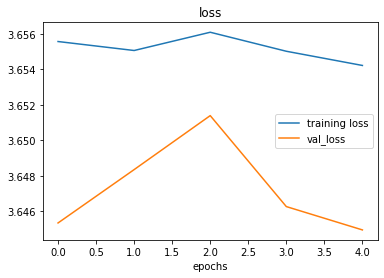

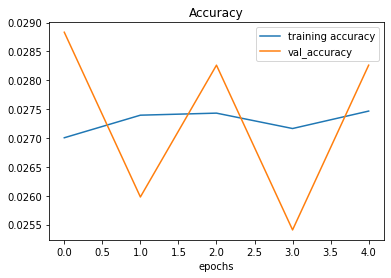

In [27]:
plot_loss_curves(history_4)

In [30]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.ResNet101V2(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(256, 256, 3), name="input_layer")

# 4. Pass the inputs to the base_model
x = base_model(inputs)

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(38, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_5 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_5.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Fit the model (we use less steps for validation so it's faster)
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data,
                        # Go through less of the validation data so epochs are faster (we want faster experiments!)
                        validation_steps=len(validation_data), 
                        )

After GlobalAveragePooling2D(): (None, 2048)
Epoch 1/5
1758/1758 [==============================] - 400s 224ms/step - loss: 0.3703 - accuracy: 0.9016 - val_loss: 0.2084 - val_accuracy: 0.9349
Epoch 2/5
1758/1758 [==============================] - 390s 222ms/step - loss: 0.1201 - accuracy: 0.9649 - val_loss: 0.1758 - val_accuracy: 0.9429
Epoch 3/5
1758/1758 [==============================] - 390s 222ms/step - loss: 0.0807 - accuracy: 0.9762 - val_loss: 0.1515 - val_accuracy: 0.9498
Epoch 4/5
1758/1758 [==============================] - 390s 222ms/step - loss: 0.0597 - accuracy: 0.9823 - val_loss: 0.1711 - val_accuracy: 0.9438
Epoch 5/5
1758/1758 [==============================] - 391s 223ms/step - loss: 0.0466 - accuracy: 0.9862 - val_loss: 0.1586 - val_accuracy: 0.9489


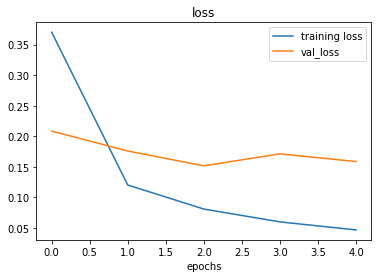

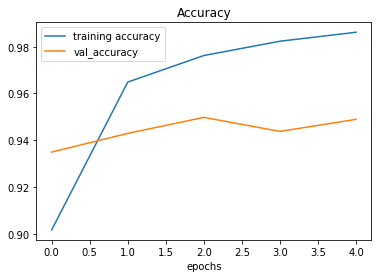

In [31]:
plot_loss_curves(history_5)

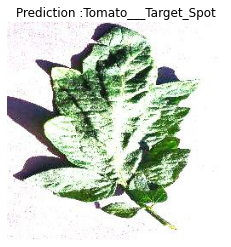

In [35]:
load_prep_pred_plot(model_5,"/content/0ac9e61f-8dda-4628-bbf9-4fd81012b7a3___Com.G_TgS_FL 8245_newPixel25.JPG" )

In [38]:

from tensorflow.keras.models import load_model

model_5.save('/content/drive/MyDrive/Colab Notebooks/Model_resnet101V2.h5')